In [2]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap="gray")
    plt.show()

In [4]:
image_path = Path(r"E:\OneDrive\Projets\twinit-dataset\preprocess\23.jpg")
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

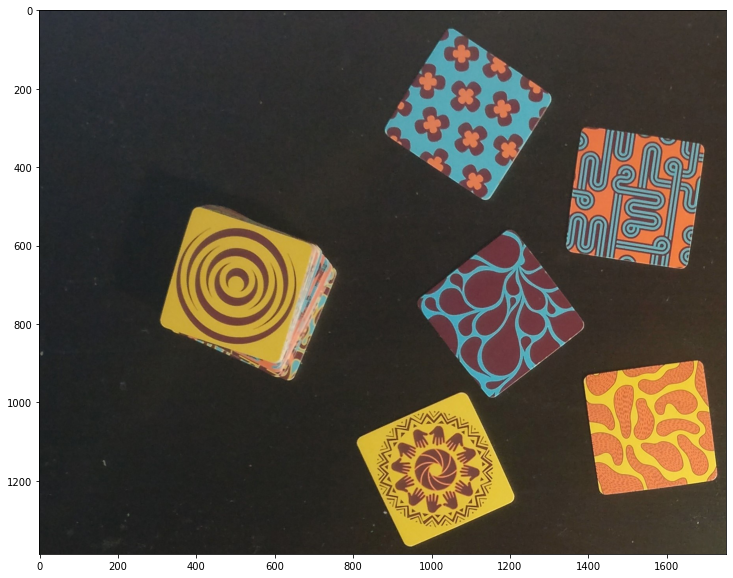

In [5]:
show(image)

In [38]:
# image = cv2.resize(image, dsize=None, fx=0.25, fy=0.25)

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

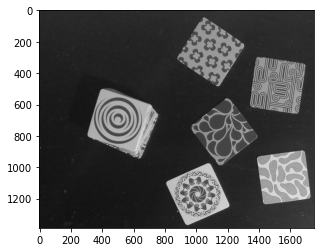

In [7]:
plt.imshow(gray, cmap="gray")
plt.show()

In [8]:
threshold_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 0)

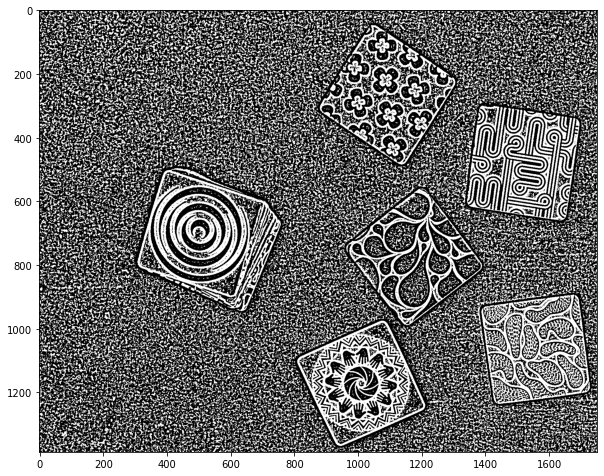

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(threshold_image, cmap="gray")
plt.show()

In [10]:
plt.imsave(f"thresholded-{image_path.name}", threshold_image, cmap="gray")

In [11]:
kernel = np.ones((5, 5), np.uint8)
erode = cv2.erode(threshold_image, kernel, iterations=1)

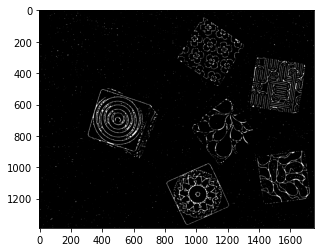

In [12]:
plt.imshow(erode, cmap="gray")
plt.show()

In [13]:
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel, iterations=1)

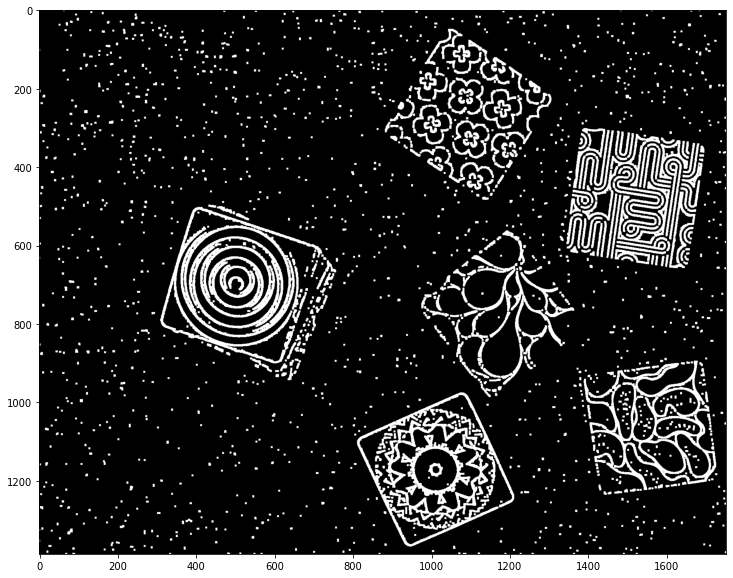

In [14]:
show(opening)

In [15]:
edges = cv2.Canny(opening,100,200)

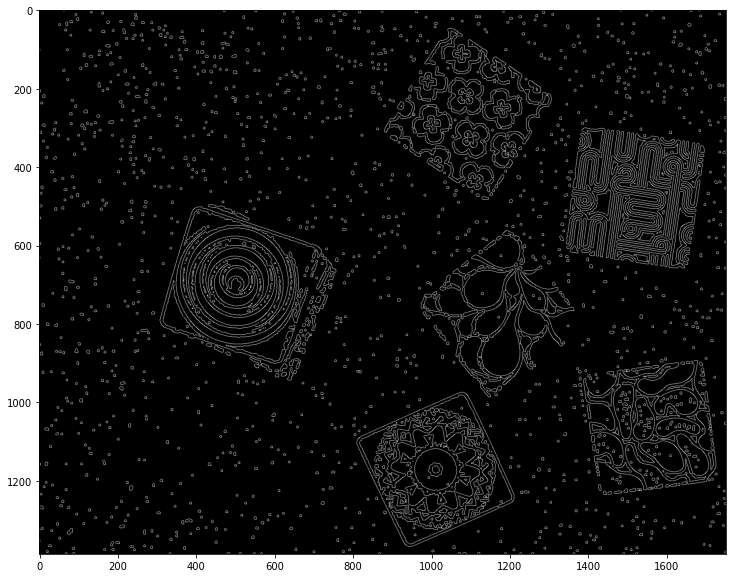

In [16]:
show(edges)

In [17]:
plt.imsave(f"opening-{image_path.name}", opening, cmap="gray")

In [18]:
plt.imsave(f"canny-{image_path.name}", edges, cmap="gray")

In [19]:
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 0)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

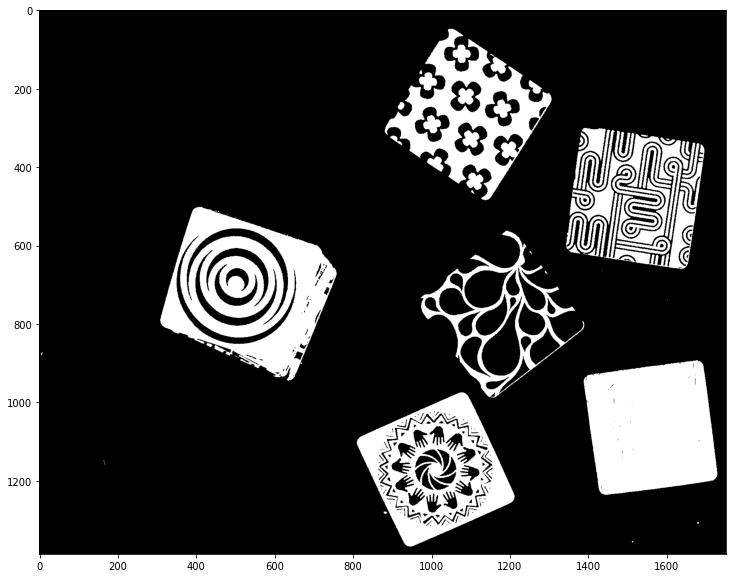

In [20]:
show(thresh)

In [51]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=15)


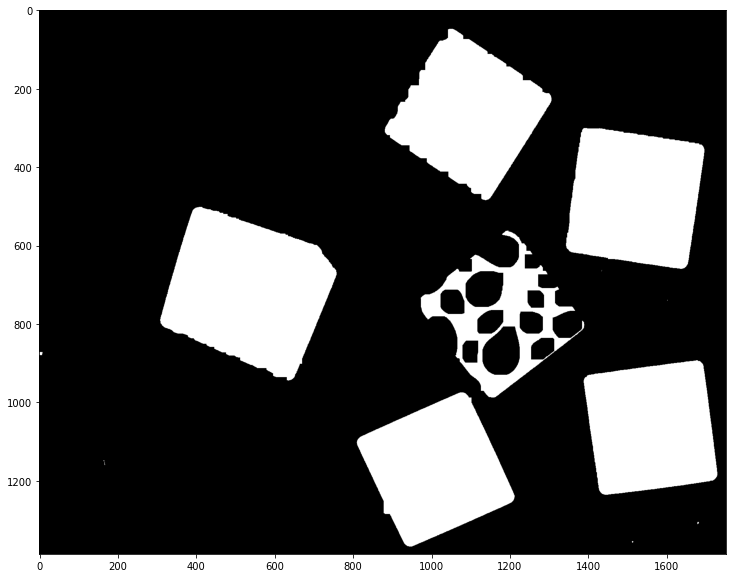

In [52]:
show(closing)

In [45]:
kernel = np.ones((7, 7), np.uint8)
closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel, iterations=10)

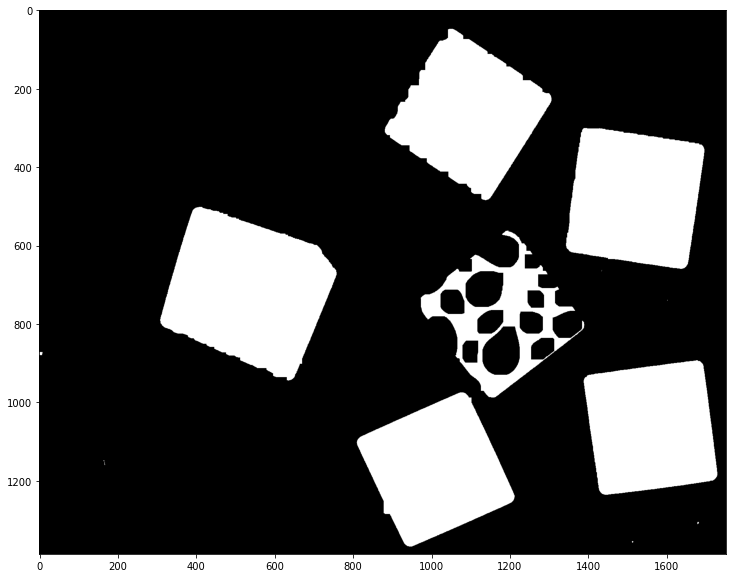

In [53]:
show(closing)

In [57]:
# get external contours
contours = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

result1 = image.copy()
result2 = image.copy()
for c in contours:
    cv2.drawContours(result1,[c],0,(0,0,0),2)
    # get rotated rectangle from contour
    rot_rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rot_rect)
    box = np.int0(box)
    # draw rotated rectangle on copy of img
    cv2.drawContours(result2,[box],0,(255,255,255),2)

In [58]:
# save result
cv2.imwrite("res1.png",cv2.cvtColor(result1, cv2.COLOR_RGB2BGR))
cv2.imwrite("res2.png",cv2.cvtColor(result2, cv2.COLOR_RGB2BGR))

True

In [ ]:
sho

In [35]:
canny = cv2.Canny(closing, 150, 180)

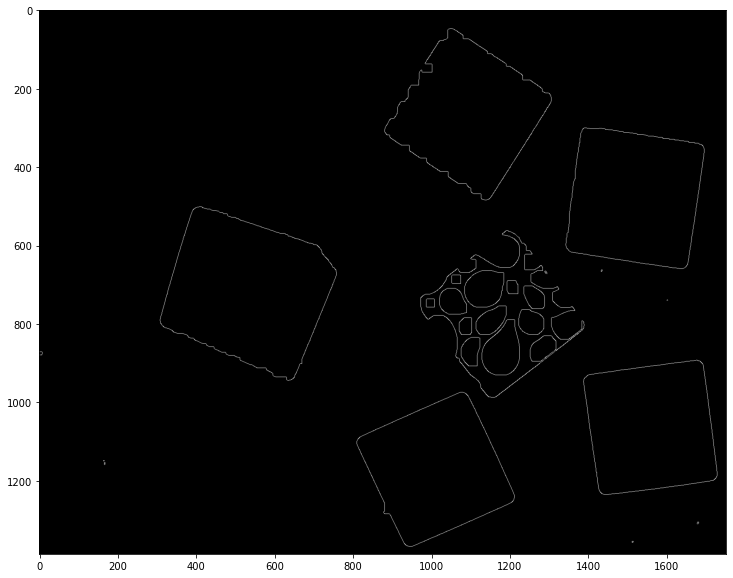

In [36]:
show(canny)

In [45]:
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

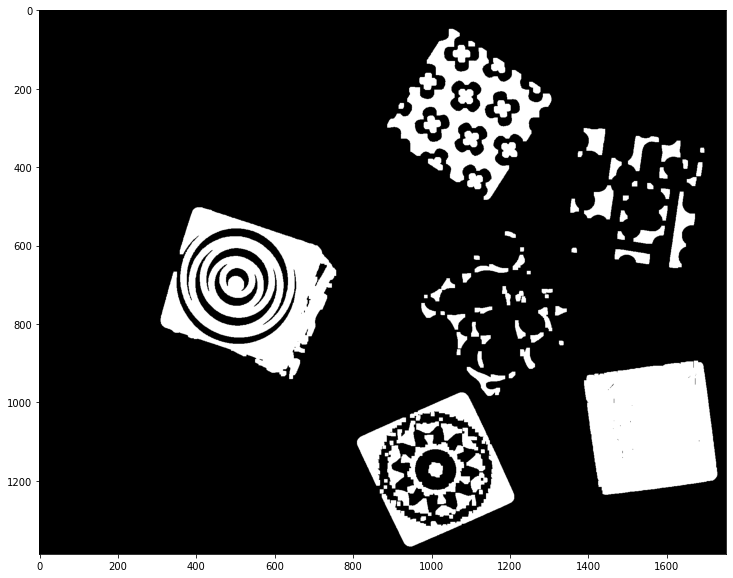

In [46]:
show(opening)

In [47]:
edges = cv2.Canny(opening,100,200)

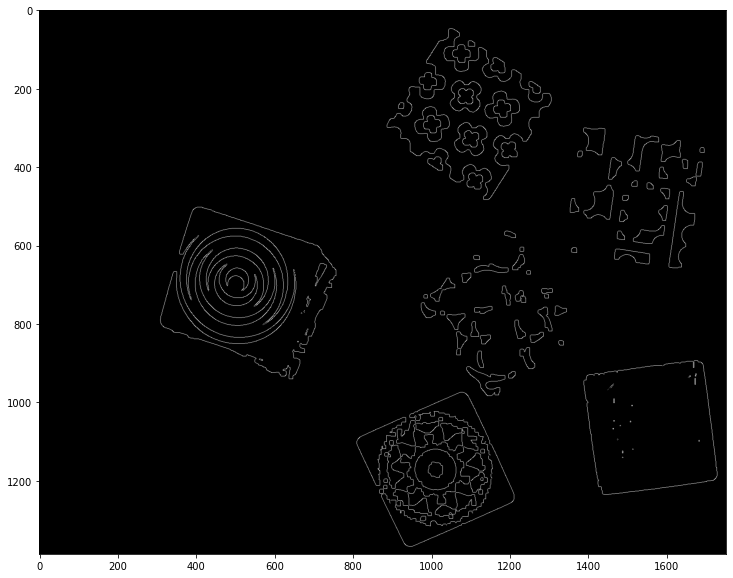

In [48]:
show(edges)

In [55]:
kernel = np.ones((7, 7), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=4)

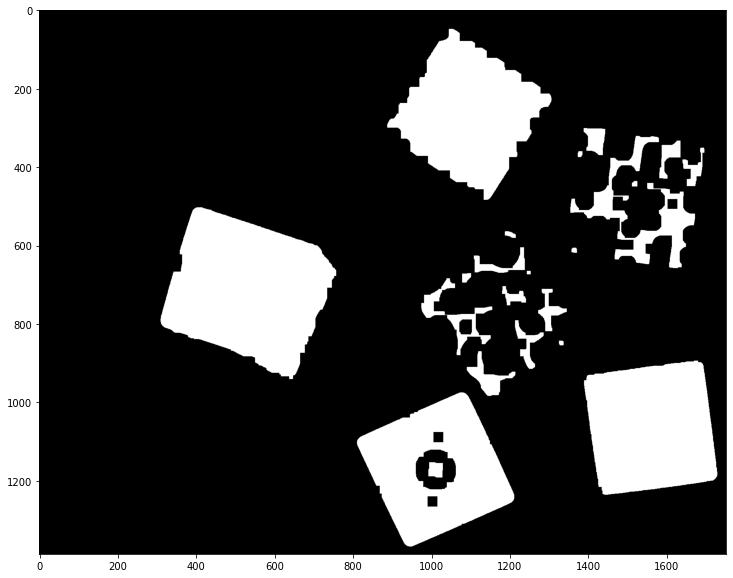

In [56]:
show(closing)